# Color Threshold, Blue Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2



### Read in and display images

In [15]:
image = cv2.imread('pizza_bluescreen2.jpg')

# print out the type of image and its shape
print('Type of the image', type(image), 'shape:', image.shape)


Type of the image <class 'numpy.ndarray'> shape: (482, 654, 3)


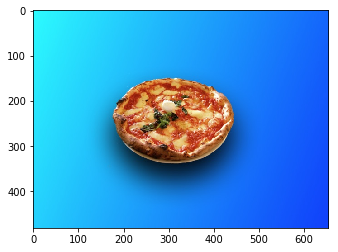

In [18]:
%matplotlib inline

# make a copy of the image
image_copy= np.copy(image)
# change the color to RGB 
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
# display using matplotlib
plt.imshow(image_copy)


### Define the color threshold


In [36]:
# define lower and upper bound for the blue color
lower_blue = np.array([0, 0, 50])
upper_blue = np.array([50, 255, 255])


### Create a mask

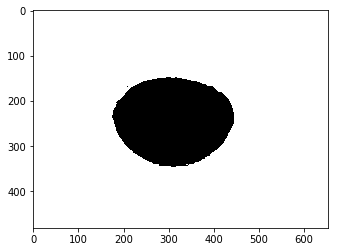

In [37]:
# Define the masked area
## this inRange function queries each pixel value to find if it falls with in the boundaries
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
## if it falls in this range, it turns those pixels to be white and the others to be 0(black)
## masking a binary operation?

# Visualize the mask
plt.imshow(mask, cmap = 'gray')

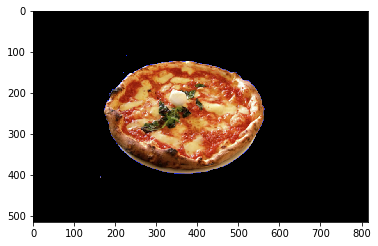

In [12]:
#  mask the image to let the pizza to show through
masked_image = np.copy(image_copy)
# now all the pixels that are not black are the blue pixels
masked_image[mask != 0] = [0, 0, 0]
# display it !
plt.imshow(masked_image)


### Mask and add a background image


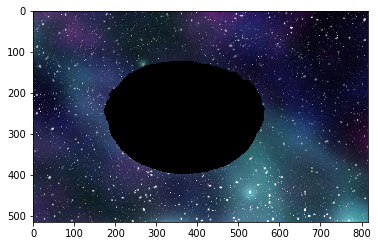

In [13]:
# load in a background image and convert it to RGB
background_image = cv2.imread('space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# mask it to show area other than pizza, leaves it with dark pixels in the pizza area
background_image = background_image[0:514, 0:816]
background_image[mask == 0] = [0, 0, 0]
# display the background image
plt.imshow(background_image)


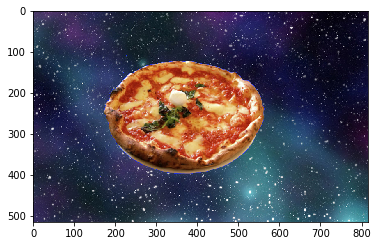

In [14]:
# add two images together to create a complete image
new_image = background_image + masked_image
plt.imshow(new_image)
